### I. Temat **"Analiza związku między miejscem zamieszkania kierowcy, a prawdopodobieństwem udziału w wypadku drogowym na terenach wiejskich."**

1.1 **Cel pracy:**  
  - Zbadanie, czy istnieje związek między miejscem zamieszkania kierowcy (wiejskim lub miejskim), a prawdopodobieństwem jego udziału w wypadku drogowym na terenie wiejskim oraz identyfikacja kluczowych czynników wpływających na przewidywanie lokalizacji wypadku, z wykorzystaniem modeli uczenia maszynowego.
  
1.2 **Pytania badawcze:**  
  - Czy miejsce zamieszkania kierowcy (miejskie vs. niemiejskie) wpływa na prawdopodobieństwo udziału w wypadku drogowym na terenie wiejskim?
  - Jakie z wybranych cech kontekstowych (np. typ drogi, warunki oświetleniowe, kontrola skrzyżowań) mają największy wpływ na prawdopodobieństwo wystąpienia wypadku na terenie wiejskim?
  - Czy modele uczenia maszynowego (XGBoost, RandomForest) mogą skutecznie przewidzieć lokalizację wypadku na podstawie miejsca zamieszkania kierowcy i cech kontekstowych?

1.3 **Hipoteza badawcza:**  
  - Kierowcy z obszarów miejskich są bardziej narażeni na udział w wypadkach drogowych na terenach wiejskich niż kierowcy z obszarów wiejskich.
  - Specyficzne cechy, takie jak drogi jednopasmowe, brak oświetlenia ulicznego oraz niekontrolowane skrzyżowania, znacząco zwiększają ryzyko wypadku na terenie wiejskim.
  - Modele uczenia maszynowego (XGBoost, RandomForest) nie osiągają wysokiej skuteczności w przewidywaniu lokalizacji wypadku (wiejskiej vs. miejskiej) na podstawie miejsca zamieszkania kierowcy i cech kontekstowych.

### II. Dane i metodyka 
1. **Źródła danych**:  
   - Dane pochodzą z oficjalnych brytyjskich baz danych (Department for Transport - data.gov.uk) dotyczących wypadków drogowych z lat 2021-2023 na terenie UK.
   - Tabele (`casualties`, `vehicles`, `accidents`) zawierające dane m.in. o ofiarach (wiek, miejsce zamieszkania), informacje o pojazdach i kierowcach (np. obszar zamieszkania, odległość od miejsca wypadku) i kontekst wypadków (warunki pogodowe, typ drogi) zostały połączone w tabelę `data` po kluczu `accident_index`.
   - Statystyki dotyczą wyłącznie wypadków z obrażeniami ciała na drogach publicznych, które są zgłaszane policji, a następnie rejestrowane przy użyciu formularza zgłaszania kolizji `STATS19`.
   - **Przewodnik**: po statystykach dotyczących wypadków drogowych: https://www.gov.uk/guidance/road-accident-and-safety-statistics-guidance
   - **Przewodnik** zestawy danych do pobrania: https://www.data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-accidents-safety-data

1. **Opis użytych zmiennych**: 
   
   W analizie wykorzystano następujące zmienne, które opisują okoliczności wypadków drogowych, charakterystyki kierowców, pojazdów oraz poszkodowanych:

   - **`road_type`** – Rodzaj drogi, na której doszło do wypadku. Kategorie obejmują: rondo (1), ulica jednokierunkowa (2), droga dwujezdniowa (3), droga jednojezdniowa (6), droga dojazdowa (7), nieznana (9), ulica jednokierunkowa/droga dojazdowa (12) lub brak danych (-1).

   - **`light_conditions`** – Warunki oświetlenia w czasie wypadku. Kategorie: światło dzienne (1), ciemność z działającym oświetleniem (4), ciemność z niedziałającym oświetleniem (5), ciemność bez oświetlenia (6), ciemność z nieznanym stanem oświetlenia (7) lub brak danych (-1).

   - **`junction_detail`** – Szczegóły dotyczące skrzyżowania w miejscu wypadku. Obejmuje: brak skrzyżowania w promieniu 20 metrów (0), rondo (1), mini-rondo (2), skrzyżowanie typu T lub rozwidlenie (3), droga dojazdowa (5), skrzyżowanie czteroramienne (6), skrzyżowanie z więcej niż 4 ramionami (7), prywatny wjazd (8), inne skrzyżowanie (9), nieznane (99) lub brak danych (-1).

   - **`junction_control`** – Rodzaj kontroli ruchu na skrzyżowaniu. Kategorie: brak skrzyżowania w promieniu 20 metrów (0), osoba upoważniona (1), sygnalizacja świetlna (2), znak stopu (3), ustąp pierwszeństwa lub brak kontroli (4), nieznane (9) lub brak danych (-1).

   - **`driver_home_area_type`** – Typ obszaru zamieszkania kierowcy. Obejmuje: obszar miejski (1), małe miasto (2), obszar wiejski (3) lub brak danych (-1).

   - **`accident_year`** – Rok, w którym doszło do wypadku.

   - **`age_of_casualty`** – Wiek osoby poszkodowanej w wypadku. Wartość -1 oznacza brak danych.

   - **`driver_distance_banding`** – Odległość miejsca wypadku od miejsca zamieszkania kierowcy. Kategorie: do 5 km (1), 5,001–10 km (2), 10,001–20 km (3), 20,001–100 km (4), powyżej 100 km (5) lub brak danych (-1).

   - **`weather_conditions`** – Warunki pogodowe w czasie wypadku. Kategorie: dobra pogoda bez silnego wiatru (1), deszcz bez silnego wiatru (2), śnieg bez silnego wiatru (3), dobra pogoda z silnym wiatrem (4), deszcz z silnym wiatrem (5), śnieg z silnym wiatrem (6), mgła (7), inne (8), nieznane (9) lub brak danych (-1).

   - **`urban_or_rural_area`** – Typ obszaru, w którym doszło do wypadku: miejski (1), wiejski (2), nieprzypisany (3) lub brak danych (-1).

   - **`casualty_type`** – Typ poszkodowanego w wypadku, np.: pieszy (0), rowerzysta (1), motocyklista (2–5, 23, 97, 103–106), pasażer 
   taksówki (8), pasażer samochodu (9), pasażer busa (10–11), jeździec konny (16), inne typy pojazdów (17–21, 90, 98–99, 108–110, 113) lub brak danych (-1).

   - **`speed_limit`** – Ograniczenie prędkości na drodze w miejscu wypadku. Wartości w milach na godzinę, np. 30, 60; 99 oznacza nieznane (zgłoszone przez uczestnika), a -1 brak danych.

   - **`driver_imd_decile`** – Poziom deprywacji społeczno-ekonomicznej kierowcy według indeksu IMD (ang. Index of Multiple Deprivation). Skala od 1 (najbardziej deprywowany 10%) do 10 (najmniej deprywowany 10%) lub brak danych (-1).

   - **`age_of_vehicle`** – Wiek pojazdu w latach w momencie wypadku. Wartość -1 oznacza brak danych.

   - **`age_of_driver`** – Wiek kierowcy w momencie wypadku. Wartość -1 oznacza brak danych.

   - **`number_of_casualties`** – Liczba osób poszkodowanych w wyniku wypadku.

   - **`skidding_and_overturning`** – Informacja o poślizgu lub przewróceniu pojazdu. Kategorie: brak (0), poślizg (1), poślizg i przewrócenie (2), wyłamanie (3), wyłamanie i przewrócenie (4), przewrócenie (5), nieznane (9) lub brak danych (-1).

3. **Przygotowanie danych:**

   -  **Oczyszczono dane:** Zastąpiono `-1` i `99` na `NaN`, a następnie usunięto wiersze z brakami w tych kolumnach.
   -  **Przekształcono czas:** Z kolumny `time` utworzono `hour_of_day`.
   -  **Przygotowanie zmiennej docelowej:** dla `driver_home_area_type` zsumowano wartości 2 i 3 (small town oraz unrual) w jedną etykietę nr 2 dla przejrzystości danych
   -  **Tworzenie zmiennych binarnych:** 
         - is_urban_driver: Kierowca pochodzi z obszaru miejskiego (`driver_home_area_type` = 1).
         - is_rural_accident: Wypadek miał miejsce na terenie wiejskim (`urban_or_rural_area` = 2).
   -  **Znormalizowano prędkość:** `speed_limit` przekształcono w `speed_limit_normalized`.
   -  **Zbindowano wiek:** `age_of_casualty` i `age_of_driver` przekształcono w `age_of_casualty_binned` i `age_of_driver_binned`.
         - Zarówno age_of_casualty jak i age_of_driver podzielono na 5 przedziałów:
         - ≤17 lat, 18-25 lat, 26-40 lat, 41-60 lat, >60 lat.
   -  **Stworzono nowe cechy:**
      * `urban_driver_speed` jako iloczyn `is_urban_driver` i `speed_limit_normalized`.
      * `is_rush_hour` na podstawie `hour_of_day`.
      * `distance_speed_interaction` jako iloczyn `driver_distance_banding` i `urban_driver_speed`.
   -  **Wybrano cechy:** Ustalono listę `selected_features`, która teraz zawiera również `casualty_type`.
   -  **Zakodowano kategorie:** Zmienne kategorialne z `selected_features` (w tym nowa kolumna `casualty_type` oraz `road_type`, `light_conditions`, `junction_detail`, `junction_control`, `age_of_casualty_binned`, `driver_distance_banding`, `weather_conditions`, `age_of_driver_binned`, `skidding_and_overturning`) zakodowano zero-jedynkowo.
   -  **Stworzono dodatkowe cechy po kodowaniu:**
      * `important_driver_distance` na podstawie `driver_distance_banding_4.0` i `driver_distance_banding_3.0`.
      * `urban_driver_long_distance` jako iloczyn `is_urban_driver` i `important_driver_distance`.
      * `urban_driver_no_junction_control` jako iloczyn `is_urban_driver` i `junction_control_4.0` (jeśli istnieje).
   -  **Podział danych: Dane podzielono na zbiory:**
      * Treningowy + walidacyjny (80%) i testowy (20%) z zachowaniem stratyfikacji..
      * Następnie zbiór treningowy + walidacyjny podzielono na treningowy (60% całości) i walidacyjny (20% całości), również ze stratyfikacją.
   -  **Balansowanie danych:**
      * Zastosowano SMOTE na zbiorze treningowym, aby zrównoważyć klasy zmiennej docelowej `is_rural_accident`.
   -  **Rozmiary zbiorów danych po przetworzeniu:**
      * Zbiór treningowy (po SMOTE): 228388 rekordów / Zbiór walidacyjny: 54611 rekordów / Zbiór testowy: 54611 rekordów.

   Celem było przygotowanie danych (X) i zmiennej docelowej (y, czyli `is_rural_accident`) do modelowania poprzez oczyszczenie, transformację i stworzenie nowych cech, uwzględniając teraz również typ uczestnika wypadku (`casualty_type`).

In [ ]:
# Standardowe biblioteki
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu, pearsonr

# Biblioteki do modelowania i uczenia maszynowego (scikit-learn)
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import (accuracy_score, mean_squared_error, mean_absolute_error, precision_score, recall_score, 
                             f1_score, log_loss, balanced_accuracy_score, accuracy_score, roc_curve, matthews_corrcoef,
                             roc_auc_score, confusion_matrix, precision_recall_curve, auc, classification_report, average_precision_score
                             )
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score, StratifiedKFold, learning_curve, validation_curve

from plotly.subplots import make_subplots
from tabulate import tabulate

# Biblioteki do zbalansowania danych
from imblearn.over_sampling import SMOTE

# Biblioteka do uczenia maszynowego
from xgboost import XGBRegressor, XGBClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

# # Wczytanie danych / # Linki do plików CSV
casualties_url = 'https://data.dft.gov.uk/road-accidents-safety-data/dft-road-casualty-statistics-casualty-last-5-years.csv'
vehicles_url = 'https://data.dft.gov.uk/road-accidents-safety-data/dft-road-casualty-statistics-vehicle-last-5-years.csv'
accidents_url = 'https://data.dft.gov.uk/road-accidents-safety-data/dft-road-casualty-statistics-collision-last-5-years.csv'

# Wczytanie danych bezpośrednio z linków
casualties = pd.read_csv(casualties_url, low_memory=False)
vehicles = pd.read_csv(vehicles_url, low_memory=False)
accidents = pd.read_csv(accidents_url, low_memory=False)

# Połączenie tabel
data = accidents.merge(casualties, on='accident_index', how='left').merge(vehicles, on='accident_index', how='left')
# Filtracja danych dla lat 2021-2023
data = data[data['accident_year'].isin([2021, 2022, 2023])]

In [ ]:
# Przygotowanie danych
columns_to_check_NaN = [
    'road_type', 'light_conditions', 'junction_detail', 'junction_control', 'driver_home_area_type', 'accident_year',
    'age_of_casualty', 'driver_distance_banding', 'weather_conditions', 'urban_or_rural_area', 'casualty_type',
    'speed_limit', 'driver_imd_decile', 'age_of_vehicle', 'age_of_driver', 'number_of_casualties', 'skidding_and_overturning'
]
data[columns_to_check_NaN] = data[columns_to_check_NaN].replace([-1, 99], np.nan)
data.dropna(subset=columns_to_check_NaN, inplace=True)

# Wyodrębnienie godziny z czasu
data['hour_of_day'] = pd.to_datetime(data['time'], format='%H:%M').dt.hour

# Definicja zmiennych
# Kierowcy z obszarów miejskich: driver_home_area_type = 1 (miejskie)
data['driver_home_area_type'] = data['driver_home_area_type'].replace({3: 2})
data['is_urban_driver'] = (data['driver_home_area_type'] == 1).astype(int)

# Wypadki na terenach wiejskich: urban_or_rural_area = 2 (wiejskie)
data['is_rural_accident'] = (data['urban_or_rural_area'] == 2).astype(int)

# Normalizacja speed_limit
scaler = StandardScaler()
data['speed_limit_normalized'] = scaler.fit_transform(data[['speed_limit']])

# Binowanie age_of_casualty
data['age_of_casualty'] = pd.to_numeric(data['age_of_casualty'], errors='coerce')
bins_age_driver = [-float('inf'), 17, 25, 40, 60, float('inf')]
labels_age_driver = ['1', '2', '3', '4', '5']
data['age_of_casualty_binned'] = pd.cut(data['age_of_casualty'], bins=bins_age_driver, labels=labels_age_driver, right=False)

# Binowanie age_of_driver
data['age_of_driver'] = pd.to_numeric(data['age_of_driver'], errors='coerce')
bins_age_driver = [-float('inf'), 17, 25, 40, 60, float('inf')]
labels_age_driver = ['1', '2', '3', '4', '5']
data['age_of_driver_binned'] = pd.cut(data['age_of_driver'], bins=bins_age_driver, labels=labels_age_driver, right=False)

# Inżyniera Cech / feature engineering
data['urban_driver_speed'] = data['is_urban_driver'] * data['speed_limit_normalized']
data['is_rush_hour'] = data['hour_of_day'].apply(lambda h: 1 if (7 <= h <= 9) or (15 <= h <= 18) else 0)
data['distance_speed_interaction'] = data['driver_distance_banding'].astype(float) * data['urban_driver_speed']

# Wybór cech do modelu
selected_features = [
    'is_urban_driver', 'road_type', 'light_conditions', 'junction_detail', 'junction_control',
    'driver_distance_banding', 'weather_conditions', 'is_rush_hour', 'age_of_driver_binned', 'age_of_casualty_binned',
    'distance_speed_interaction', 'speed_limit_normalized', 'driver_imd_decile', 
    'hour_of_day', 'number_of_casualties', 'urban_driver_speed', 'skidding_and_overturning', 'casualty_type'
]

# Przygotowanie danych: kodowanie kategorialne
X = data[selected_features]
X = pd.get_dummies(X, columns=['road_type', 'light_conditions', 'junction_detail', 'junction_control',
                               'age_of_casualty_binned', 'driver_distance_banding', 'is_rush_hour', 
                               'weather_conditions', 'age_of_driver_binned', 'skidding_and_overturning', 'casualty_type'
                               ], drop_first=True)
y = data['is_rural_accident']

#Inżynieria cech po dummies
X['important_driver_distance'] = (X['driver_distance_banding_4.0'] + X['driver_distance_banding_3.0'] > 0).astype(int)
X['urban_driver_long_distance'] = X['is_urban_driver'] * X['important_driver_distance']

     # Przykład dla junction_control_4.0 (np. brak kontroli ruchu)
if 'junction_control_4.0' in X.columns:
    X['urban_driver_no_junction_control'] = X['is_urban_driver'] * X['junction_control_4.0']

# Podział na zbiór treningowy + walidacyjny (80%) i testowy (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Podział X_temp na zbiór treningowy (60% z całości) i walidacyjny (20% z całości)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

# Oversampling klasy mniejszościowej (SMOTE)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Sprawdzenie rozmiarów zbiorów
print(f"\nRozmiary zbiorów po SMOTE:")
print(f"Zbiór treningowy: {X_train.shape[0]} rekordów")
print(f"Zbiór walidacyjny: {X_val.shape[0]} rekordów")
print(f"Zbiór testowy: {X_test.shape[0]} rekordów")


Rozmiary zbiorów po SMOTE:
Zbiór treningowy: 228388 rekordów
Zbiór walidacyjny: 54611 rekordów
Zbiór testowy: 54611 rekordów



Tabela1: Proporcje kierowców według miejsca zamieszkania:
+----+---------------+--------------------+-----------+
|    | Pochodzenie   |   Liczba kierowców | Procent   |
+====+===============+====================+===========+
|  0 | Miejski       |             222719 | 81.6%     |
+----+---------------+--------------------+-----------+
|  1 | Niemiejski    |              50334 | 18.4%     |
+----+---------------+--------------------+-----------+
|  2 | Suma          |             273053 | 100.0%    |
+----+---------------+--------------------+-----------+


Tabela2: Rozkład kierowców według miejsca zamieszkania w poszczególnych latach:
+------+-------+--------------+----------------------+-----------+-------------------+--------+
|      |   Rok |   Niemiejski | Procent Niemiejski   |   Miejski | Procent Miejski   |   Suma |
+======+=======+==============+======================+===========+===================+========+
| 2021 |  2021 |        15908 | 17.8%                |     73686 | 

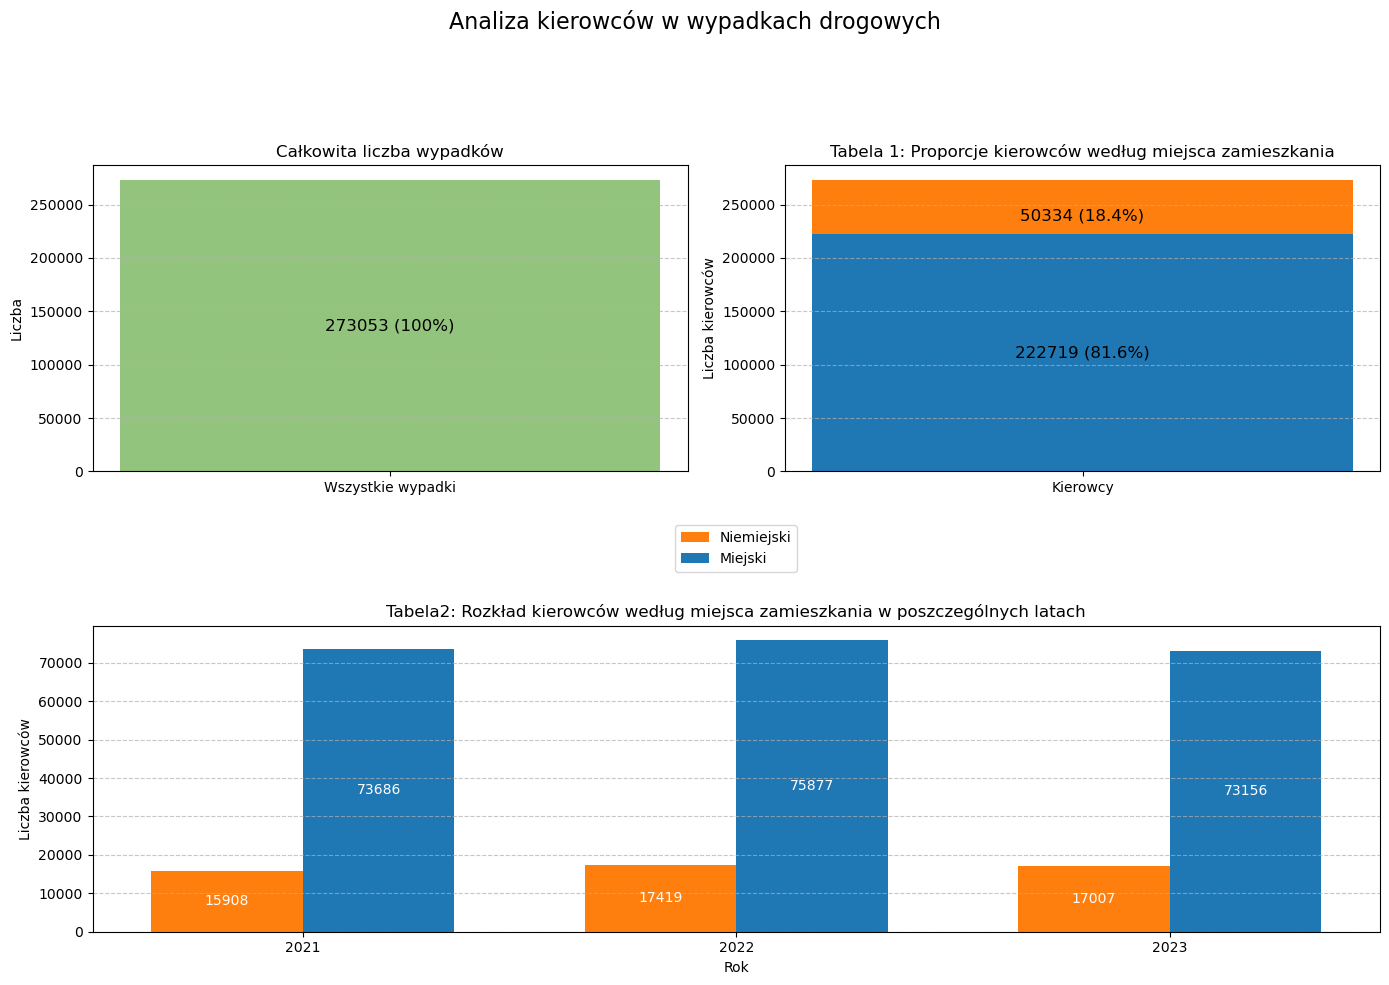

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

# Zakładam, że 'data' jest już załadowane i przetworzone zgodnie z Twoim wcześniejszym kodem.

# === Pierwszy zestaw danych i tabela ===
# 1. Całkowita liczba wypadków
total_accidents = len(data)
total_stats = pd.DataFrame({
    'Kategoria': ['Wszystkie wypadki'],
    'Liczba': [total_accidents],
    'Procent': [100.0]
})

# 2. Proporcje kierowców z obszarów miejskich i niemiejskich
driver_origin = data['is_urban_driver'].value_counts().reset_index()
driver_origin.columns = ['is_urban_driver', 'Liczba kierowców']
driver_origin['Pochodzenie'] = driver_origin['is_urban_driver'].map({0: 'Niemiejski', 1: 'Miejski'})
driver_origin['Procent'] = (driver_origin['Liczba kierowców'] / driver_origin['Liczba kierowców'].sum()) * 100

# Przygotowanie danych do tabeli dla proporcji kierowców
driver_origin_display = driver_origin[['Pochodzenie', 'Liczba kierowców', 'Procent']].copy()
driver_origin_display['Procent'] = driver_origin_display['Procent'].map('{:.1f}%'.format)
driver_origin_display.loc[len(driver_origin_display)] = ['Suma', driver_origin['Liczba kierowców'].sum(), '100.0%']

# Wyświetlenie pierwszej tabeli
print("="*50)
print("\nTabela1: Proporcje kierowców według miejsca zamieszkania:")
print(tabulate(driver_origin_display, headers="keys", tablefmt="grid"))
print("\n")

# === Drugi zestaw danych i tabela ===
# Przygotowanie danych dla rozkładu kierowców według lat
driver_stats = data.groupby(['accident_year', 'is_urban_driver']).size().unstack()
driver_stats.columns = ['Niemiejski', 'Miejski']
driver_stats['Rok'] = driver_stats.index

# Obliczamy sumę i procenty
driver_stats['Suma'] = driver_stats['Niemiejski'] + driver_stats['Miejski']
driver_stats['Procent Niemiejski'] = (driver_stats['Niemiejski'] / driver_stats['Suma']) * 100
driver_stats['Procent Miejski'] = (driver_stats['Miejski'] / driver_stats['Suma']) * 100

# Przygotowanie tabeli do wyświetlenia - usuwamy 'accident_year', zostawiamy tylko 'Rok'
driver_stats_display = driver_stats[['Rok', 'Niemiejski', 'Procent Niemiejski', 'Miejski', 'Procent Miejski', 'Suma']].copy()
driver_stats_display['Procent Niemiejski'] = driver_stats_display['Procent Niemiejski'].map('{:.1f}%'.format)
driver_stats_display['Procent Miejski'] = driver_stats_display['Procent Miejski'].map('{:.1f}%'.format)

# Wyświetlenie drugiej tabeli
print("="*50)
print("Tabela2: Rozkład kierowców według miejsca zamieszkania w poszczególnych latach:")
print(tabulate(driver_stats_display, headers=['Rok', 'Niemiejski', 'Procent Niemiejski', 'Miejski', 'Procent Miejski', 'Suma'], tablefmt="grid"))
print("\n")

# === Tworzenie wykresów ===
# Tworzenie figury z trzema wykresami w układzie 2x2 (z trzecim rozciągniętym)
fig = plt.figure(figsize=(14, 10))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1])  # Ustalamy siatkę 2x2

# Wykres 1: Całkowita liczba wypadków (lewy górny)
ax1 = fig.add_subplot(gs[0, 0])
bars1 = ax1.bar(total_stats['Kategoria'], total_stats['Liczba'], color='#93c47d')
ax1.set_title('Całkowita liczba wypadków')
ax1.set_ylabel('Liczba')
ax1.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height/2, 
             f'{int(height)} (100%)', ha='center', va='center', fontsize=12, color='black')

# Wykres 2: Proporcje kierowców (prawy górny)
ax2 = fig.add_subplot(gs[0, 1])
bars2 = ax2.bar(['Kierowcy'], driver_origin['Liczba kierowców'][0], color='#1f77b4', label='Niemiejski')
bars3 = ax2.bar(['Kierowcy'], driver_origin['Liczba kierowców'][1], bottom=driver_origin['Liczba kierowców'][0], 
                color='#ff7f0e', label='Miejski')
ax2.set_title('Proporcje kierowców według miejsca zamieszkania')
ax2.set_ylabel('Liczba kierowców')
# ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25))  # Legenda wysoko
ax2.grid(axis='y', linestyle='--', alpha=0.7)
for i, (bar, procent) in enumerate(zip([bars2[0], bars3[0]], driver_origin['Procent'])):
    height = bar.get_height()
    bottom = bar.get_y()
    text_position = bottom + height/2 if i == 0 else bottom + height/3
    ax2.text(bar.get_x() + bar.get_width()/2., text_position, 
             f"{int(height)} ({procent:.1f}%)", ha='center', va='center', fontsize=12)

# Wykres 3: Rozkład kierowców według lat (dolny, rozciągnięty na obie kolumny)
ax3 = fig.add_subplot(gs[1, :])  # Rozciągnięcie na obie kolumny
bar_width = 0.35
x = range(len(driver_stats))
bars4 = ax3.bar(x, driver_stats['Niemiejski'], width=bar_width, color='#ff7f0e', label='Niemiejski')
bars5 = ax3.bar([i + bar_width for i in x], driver_stats['Miejski'], width=bar_width, color='#1f77b4', label='Miejski')
ax3.set_title('Tabela2: Rozkład kierowców według miejsca zamieszkania w poszczególnych latach')
ax3.set_xlabel('Rok')
ax3.set_ylabel('Liczba kierowców')
ax3.set_xticks([i + bar_width/2 for i in x])
ax3.set_xticklabels(driver_stats['Rok'])
ax3.legend(loc='upper center', bbox_to_anchor=(0.5, 1.35))  # Legenda wysoko
ax3.grid(axis='y', linestyle='--', alpha=0.7)

# Umieszczenie liczb wewnątrz słupków
for bars in [bars4, bars5]:
    for bar in bars:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height/2,  # Pozycja w połowie wysokości słupka
                 f'{int(height)}', ha='center', va='center', fontsize=10, color='white')

# Dostosowanie układu
fig.suptitle('Tabela1: Analiza kierowców w wypadkach drogowych', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.90])  # Miejsce na legendy i tytuł
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import plotly.express as px
from tabulate import tabulate

# Zakładam, że tabela 'data' jest już przygotowana z Twojego wcześniejszego kodu
# Zawiera zmienne 'is_urban_driver' i 'is_rural_accident'

# 1. Tworzenie tabeli kontyngencji na podstawie danych
contingency_table = pd.crosstab(data['is_urban_driver'], data['is_rural_accident'])
contingency_table.index = ['Kierowca niemiejski', 'Kierowca miejski']
contingency_table.columns = ['Wypadek miejski', 'Wypadek wiejski']

# Wyświetlenie obserwowanej tabeli kontyngencji
print("="*50)
print("Obserwowana tabela kontyngencji:")
print(contingency_table)
print("\n")

# 2. Obliczenie procentów uczestników wypadków wg miejsca zamieszkania
location_stats = pd.crosstab(data['is_urban_driver'], data['is_rural_accident'], 
                             normalize='index') * 100
location_stats.index = ['Kierowca niemiejski', 'Kierowca miejski']
location_stats.columns = ['Miejskie', 'Wiejskie']
location_stats['Suma'] = 100

# Przygotowanie tabeli do wyświetlenia
location_stats_display = location_stats.copy()
location_stats_display['Miejskie'] = location_stats_display['Miejskie'].map('{:.1f}%'.format)
location_stats_display['Wiejskie'] = location_stats_display['Wiejskie'].map('{:.1f}%'.format)
location_stats_display['Suma'] = location_stats_display['Suma'].map('{:.0f}%'.format)

print("="*50)
print("Procent uczestników wypadków miejskich i wiejskich wg miejsca zamieszkania kierowcy:")
print(tabulate(location_stats_display, headers="keys", tablefmt="grid"))
print("\n")

# 3. Przeprowadzenie testu chi-kwadrat
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Obliczenie całkowitej liczby obserwacji
n = contingency_table.values.sum()

# Obliczenie współczynnika Phi
phi = np.sqrt(chi2 / n)

# Wyświetlenie wyników testu chi-kwadrat
print("="*50)
print("Wyniki testu chi-kwadrat:")
print(f"Statystyka chi-kwadrat (χ²): {chi2:.4f}")
print(f"p-value: {p:.4e}")
print(f"Stopnie swobody (dof): {dof}")
print(f"Współczynnik Phi (φ): {phi:.4f}")
print("\nOczekiwana tabela kontyngencji (dla H₀):")
print(pd.DataFrame(expected, index=['Kierowca niemiejski', 'Kierowca miejski'], 
                   columns=['Wypadek miejski', 'Wypadek wiejski']).round(1))
print("\n")

# 4. Interpretacja siły związku na podstawie Phi
print("="*50)
print("Interpretacja współczynnika Phi:")
if phi < 0.1:
    print("Siła związku: Bardzo słaby (φ < 0.1)")
elif 0.1 <= phi < 0.3:
    print("Siła związku: Słaby (φ = 0.1–0.3)")
elif 0.3 <= phi < 0.5:
    print("Siła związku: Umiarkowany (φ = 0.3–0.5)")
else:
    print("Siła związku: Silny (φ ≥ 0.5)")
print("\n")

# 5. Interpretacja wyniku testu chi-kwadrat
alpha = 0.05  # Poziom istotności
if p < alpha:
    print("Wniosek z testu chi-kwadrat: Odrzucamy hipotezę zerową (H₀).")
    print("Istnieje statystycznie istotny związek między miejscem zamieszkania kierowcy a lokalizacją wypadku (p < 0.05).")
else:
    print("Wniosek z testu chi-kwadrat: Nie ma podstaw do odrzucenia hipotezy zerowej (H₀).")
    print("Nie stwierdzono statystycznie istotnego związku między miejscem zamieszkania kierowcy a lokalizacją wypadku (p >= 0.05).")
print("\n")

# 6. Wykres słupkowy
# Reset indeksu i zmiana nazwy kolumny 'index' na 'is_urban_driver'
location_stats_reset = location_stats.reset_index().rename(columns={'index': 'is_urban_driver'})

fig = px.bar(location_stats_reset, 
             x='is_urban_driver', 
             y=['Miejskie', 'Wiejskie'],
             title='Procent uczestników wypadków miejskich i wiejskich<br>wg miejsca zamieszkania kierowcy',
             labels={'value': 'Procent wypadków', 'variable': 'Typ obszaru', 'is_urban_driver': 'Pochodzenie kierowcy'},
             color_discrete_map={'Miejskie': '#1f77b4', 'Wiejskie': '#ff7f0e'},
             barmode='group')
fig.update_layout(yaxis={'ticksuffix': '%', 'title': 'Procent wypadków'},
                  xaxis={'title': 'Pochodzenie kierowcy'},
                  legend_title='Typ obszaru')
fig.update_traces(texttemplate='%{y:.1f}%', textposition='auto')
fig.show()

Obserwowana tabela kontyngencji:
                     Wypadek miejski  Wypadek wiejski
Kierowca niemiejski            15893            34441
Kierowca miejski              174431            48288


Procent uczestników wypadków miejskich i wiejskich wg miejsca zamieszkania kierowcy:
+---------------------+------------+------------+--------+
|                     | Miejskie   | Wiejskie   | Suma   |
+=====================+============+============+========+
| Kierowca niemiejski | 31.6%      | 68.4%      | 100%   |
+---------------------+------------+------------+--------+
| Kierowca miejski    | 78.3%      | 21.7%      | 100%   |
+---------------------+------------+------------+--------+


Wyniki testu chi-kwadrat:
Statystyka chi-kwadrat (χ²): 42475.6019
p-value: 0.0000e+00
Stopnie swobody (dof): 1
Współczynnik Phi (φ): 0.3944

Oczekiwana tabela kontyngencji (dla H₀):
                     Wypadek miejski  Wypadek wiejski
Kierowca niemiejski          35083.9          15250.1
Kierowca miej

### Analiza związku między miejscem zamieszkania kierowcy a prawdopodobieństwem udziału w wypadku drogowym na terenach wiejskich

**Tabela 1: Proporcje kierowców według miejsca zamieszkania**
| Pochodzenie   | Liczba kierowców | Procent |
|---------------|------------------|---------|
| Miejski       | 222719           | 81.6%   |
| Niemiejski    | 50334            | 18.4%   |
| Suma          | 273053           | 100.0%  |

Kierowcy z obszarów miejskich dominują w ogólnej liczbie wypadków, co może odzwierciedlać większą populację miejską lub częstsze korzystanie z dróg.

**Tabela 2: Rozkład kierowców według miejsca zamieszkania w latach**
| Rok  | Niemiejski | Procent Niemiejski | Miejski | Procent Miejski | Suma  |
|------|------------|--------------------|---------|-----------------|-------|
| 2021 | 15908      | 17.8%              | 73686   | 82.2%           | 89594 |
| 2022 | 17419      | 18.7%              | 75877   | 81.3%           | 93296 |
| 2023 | 17007      | 18.9%              | 73156   | 81.1%           | 90163 |

Proporcje pozostają stosunkowo stałe, z lekkim wzrostem udziału kierowców niemiejskich w 2023 roku.

#### 3. Lokalizacja wypadków według miejsca zamieszkania kierowcy
Kluczowym elementem analizy było zbadanie, gdzie (na terenach miejskich czy wiejskich) dochodzi do wypadków w zależności od pochodzenia kierowcy:
- **Kierowcy niemiejscy**:
  - Wypadki miejskie: 31.6%.
  - Wypadki wiejskie: 68.4%.
- **Kierowcy miejscy**:
  - Wypadki miejskie: 78.3%.
  - Wypadki wiejskie: 21.7%.

**Tabela 3: Procent uczestników wypadków wg miejsca zamieszkania i lokalizacji**
| Pochodzenie kierowcy | Miejskie | Wiejskie | Suma  |
|-----------------------|----------|----------|-------|
| Kierowca niemiejski   | 31.6%    | 68.4%    | 100%  |
| Kierowca miejski      | 78.3%    | 21.7%    | 100%  |

---

#### 4. Test chi-kwadrat dla niezależności:
Aby ocenić, czy istnieje statystycznie istotny związek między miejscem zamieszkania kierowcy a lokalizacją wypadku, przeprowadzono **test chi-kwadrat**.  
- **Hipoteza zerowa (H₀):** Nie ma związku między pochodzeniem kierowcy a lokalizacją wypadku.  
- **Hipoteza alternatywna (H₁):** Istnieje związek między tymi zmiennymi.  

**Wyniki testu:**  

1. **Tabela kontyngencji (obserwowane częstości):**  
   |                     | Wypadek miejski | Wypadek wiejski | **Razem** |  
   |---------------------|-----------------|-----------------|-----------|  
   | **Kierowca niemiejski** | 15,893         | 34,441          | **50,334** |  
   | **Kierowca miejski**    | 174,431        | 48,288          | **222,719** |  
   | **Razem**              | **190,324**    | **82,729**      | **273,053** |  


2. **Wyniki testu statystycznego:**  
   - χ² = **42,475.60** (df = 1)  
   - p-value = **< 0.00001** (istotność praktycznie zerowa)  
   - Współczynnik Phi (φ) = **0.394** → związek **umiarkowany**  

3. **Tabela oczekiwana (dla H₀):**  
   |                     | Wypadek miejski | Wypadek wiejski |  
   |---------------------|-----------------|-----------------|  
   | **Kierowca niemiejski** | 35,083.9       | 15,250.1        |  
   | **Kierowca miejski**    | 155,240.1      | 67,478.9        |  

**Wnioski:**  
1. **Istotność statystyczna:**  
   - p-value < 0.001 → **odrzucamy H₀** (związek jest statystycznie istotny).  

2. **Siła związku:**  
   - Współczynnik Phi (φ = 0.394) wskazuje na **umiarkowaną siłę związku** między zmiennymi.  

3. **Dodatkowe uwagi:**  
- **Wielkość próby:** Wynik jest wiarygodny dzięki dużej próbie (N = 273,053).  
- **Efekt praktyczny:** Test chi-kwadrat wykazał statystycznie istotny związek między miejscem zamieszkania kierowcy a lokalizacją wypadku (χ² = 42,475.6, p < 0.001, φ = 0.39). Mimo istotności statystycznej, siła związku (φ = 0.394) wskazuje, że inne czynniki (np. warunki drogowe, doświadczenie kierowcy)  

---

### Wnioski
1. **Istnienie związku**: Analiza wykazała wyraźny związek między miejscem zamieszkania kierowcy a lokalizacją wypadku. Kierowcy z obszarów wiejskich mają ponad 3-krotnie wyższe prawdopodobieństwo udziału w wypadkach na terenach wiejskich (68.4%) w porównaniu do kierowców miejskich (21.7%). Z kolei kierowcy miejscy częściej uczestniczą w wypadkach na terenach miejskich (78.3%).
2. **Interpretacja**: 
   - Kierowcy wiejscy mogą być bardziej narażeni na wypadki na terenach wiejskich ze względu na większą znajomość lub częstsze korzystanie z takich dróg.
   - Kierowcy miejscy, prawdopodobnie bardziej przyzwyczajeni do ruchu miejskiego, rzadziej ulegają wypadkom na terenach wiejskich, co może wskazywać na różnice w doświadczeniu lub stylu jazdy.
3. **Stabilność czasowa**: Proporcje kierowców miejskich i niemiejskich pozostają stabilne w latach 2021–2023, co sugeruje, że obserwowany związek jest trwały w czasie.

---

### Podsumowanie
Na podstawie danych z brytyjskich baz wypadków drogowych z lat 2021–2023 stwierdzono, że istnieje związek między miejscem zamieszkania kierowcy a prawdopodobieństwem udziału w wypadku na terenie wiejskim. Kierowcy z obszarów niemiejskich wykazują ponad trzykrotnie wyższe prawdopodobieństwo участия w wypadkach wiejskich (68.4%) niż kierowcy miejscy (21.7%). Wyniki te wskazują na istotną rolę miejsca zamieszkania w kontekście lokalizacji wypadków drogowych. Dalsze badania mogą skupić się na analizie dodatkowych czynników (np. wieku, warunków pogodowych) z wykorzystaniem modeli uczenia maszynowego, aby lepiej zrozumieć mechanizmy stojące za tymi zależnościami.

In [ ]:
################################

# II. CZ. 2 - Identyfikacja kluczowych czynników wpływających na przewidywanie lokalizacji wypadku (na terenie wiejskim), z wykorzystaniem modeli uczenia maszynowego.

Drugi cel pracy koncentruje się na identyfikacji kluczowych czynników wpływających na przewidywanie, czy wypadek drogowy miał miejsce na terenie wiejskim (`is_rural_accident`), z wykorzystaniem modeli uczenia maszynowego. . W tej części pracy przeprowadzono proces trenowania i porównania dwóch zaawansowanych modeli klasyfikacyjnych: **XGBoost** oraz **Random Forest**, w kontekście zbadania binarnej klasyfikacji lokalizacji wypadku drogowego – czy miał on miejsce na **terenie wiejskim**, czy nie.

1. **Trenowanie modeli XGBoost i Random Forest** na przygotowanym zbiorze treningowym, z zastosowaniem odpowiednio dobranych hiperparametrów.
   
2. **Ocena modeli** na zbiorze walidacyjnym i testowym:
   - Wykorzystano metryki jakości klasyfikacji: `classification_report` (zawierający m.in. dokładność, precyzję, recall i F1-score) oraz **AUC-ROC** (miara jakości probabilistycznej klasyfikacji).

3. Na podstawie wyników metryk walidacyjnych i testowych **wybrano model XGBoost** jako skuteczniejszy model (wyższe AUC-ROC).

4. Następnie dla modelu XGBoost przeanalizowano **ważność cech wejściowych (feature importance)**:
   - Utworzono tabelę ważności cech na podstawie atrybutu `.feature_importances_`,
   - Wybrano 12 najważniejszych cech i zaprezentowano je zarówno w formie tekstowej, jak i graficznej (wykres słupkowy poziomy).

5. Wykonano Testy niezależności (chi-kwadrat):
   - Na najważniejszych zmiennych kategorialnych z `is_rural_accident`, aby sprawdzić siłę powiązań.
   - Dokonano interpretacji efektu (słaby, umiarkowany, silny) na podstawie wartości V Craméra.

6. Sprawdzono skuteczność modelu XGBoost:
    - Wygenerowano krzywą ROC + AUC dla modelu XGBoost (ocena rozdzielczości modelu).
    - Wygenerowano uczenia się modelu XGBoost - learning_curve() ze scoringiem F1 (Graficzna ocena przeuczenia (overfitting) lub niedouczenia (underfitting)).

7. Wyniki podsumowujące analizę.

In [ ]:
# Model XGBoost - trenowanie na zbiorze treningowym
xgb_model = XGBClassifier(
    random_state=42,
    scale_pos_weight=1,  # Po SMOTE nie potrzebujemy scale_pos_weight
    max_depth=9,
    n_estimators=269,
    learning_rate=0.06,
    reg_alpha=0.1,
    reg_lambda=1.9,
    subsample=0.8,
    colsample_bytree=0.6,
)
#xgb_model.fit(X_train, y_train) #--> teraz nie uwayzamy, bo pod walidacja krzyzowa to zrobimy

#Używamy 5-krotnej walidacji krzyżowej (cv=5)
scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='roc_auc')  # Możesz wybrać inną metrykę, np. 'accuracy'
xgb_model.fit(X_train, y_train)

# Model RandomForest - trenowanie na zbiorze treningowym
rf_model = RandomForestClassifier(
    random_state=42,
    n_estimators=229,
    max_depth=14,
    min_samples_split=54,
    min_samples_leaf=26,
    n_jobs=-1,
    max_features='sqrt',
    criterion='entropy',
    bootstrap=False
)
# rf_model.fit(X_train, y_train)
# Walidacja krzyżowa (5-krotna)
scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='roc_auc')  # Możesz użyć innej metryki
rf_model.fit(X_train, y_train)

# Ocena modelu XGBoost na zbiorze walidacyjnym (próg 0.5)
y_val_pred_proba_xgb = xgb_model.predict_proba(X_val)[:, 1]
y_val_pred_xgb = (y_val_pred_proba_xgb >= 0.5).astype(int)
print("\nWyniki XGBoost na zbiorze walidacyjnym (próg 0.5):\n", classification_report(y_val, y_val_pred_xgb))
print(f"AUC-ROC XGBoost (walidacyjny): {roc_auc_score(y_val, y_val_pred_proba_xgb):.4f}")

# Ocena modelu RandomForest na zbiorze walidacyjnym (próg 0.5)
y_val_pred_proba_rf = rf_model.predict_proba(X_val)[:, 1]
y_val_pred_rf = (y_val_pred_proba_rf >= 0.5).astype(int)
print("\nWyniki RandomForest na zbiorze walidacyjnym (próg 0.5):\n", classification_report(y_val, y_val_pred_rf))
print(f"AUC-ROC RandomForest (walidacyjny): {roc_auc_score(y_val, y_val_pred_proba_rf):.4f}")

# Ocena modelu XGBoost na zbiorze testowym (próg 0.5)
y_test_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
y_test_pred_xgb = (y_test_pred_proba_xgb >= 0.5).astype(int)
print("\n=== Testowanie XGBoost na zbiorze testowym (próg 0.5) ===")
print(classification_report(y_test, y_test_pred_xgb))
print(f"AUC-ROC XGBoost (testowy): {roc_auc_score(y_test, y_test_pred_proba_xgb):.4f}")

# Ocena modelu RandomForest na zbiorze testowym (próg 0.5)
y_test_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
y_test_pred_rf = (y_test_pred_proba_rf >= 0.5).astype(int)
print("\n=== Testowanie RandomForest na zbiorze testowym (próg 0.5) ===")
print(classification_report(y_test, y_test_pred_rf))
print(f"AUC-ROC RandomForest (testowy): {roc_auc_score(y_test, y_test_pred_proba_rf):.4f}")


Wyniki XGBoost na zbiorze walidacyjnym (próg 0.5):
               precision    recall  f1-score   support

           0       0.91      0.93      0.92     38065
           1       0.83      0.79      0.81     16546

    accuracy                           0.89     54611
   macro avg       0.87      0.86      0.86     54611
weighted avg       0.89      0.89      0.89     54611

AUC-ROC XGBoost (walidacyjny): 0.9400

Wyniki RandomForest na zbiorze walidacyjnym (próg 0.5):
               precision    recall  f1-score   support

           0       0.92      0.88      0.90     38065
           1       0.76      0.83      0.79     16546

    accuracy                           0.87     54611
   macro avg       0.84      0.86      0.85     54611
weighted avg       0.87      0.87      0.87     54611

AUC-ROC RandomForest (walidacyjny): 0.9338

=== Testowanie XGBoost na zbiorze testowym (próg 0.5) ===
              precision    recall  f1-score   support

           0       0.91      0.93      0

Ważność cech (XGBoost) - 12 najważniejszych:
Cecha: speed_limit_normalized, Ważność: 0.1827
Cecha: urban_driver_speed, Ważność: 0.1711
Cecha: is_urban_driver, Ważność: 0.0566
Cecha: distance_speed_interaction, Ważność: 0.0543
Cecha: junction_detail_1.0, Ważność: 0.0291
Cecha: road_type_6, Ważność: 0.0268
Cecha: junction_control_4.0, Ważność: 0.0242
Cecha: light_conditions_6.0, Ważność: 0.0231
Cecha: casualty_type_9.0, Ważność: 0.0170
Cecha: important_driver_distance, Ważność: 0.0166
Cecha: urban_driver_long_distance, Ważność: 0.0148
Cecha: skidding_and_overturning_9.0, Ważność: 0.0132




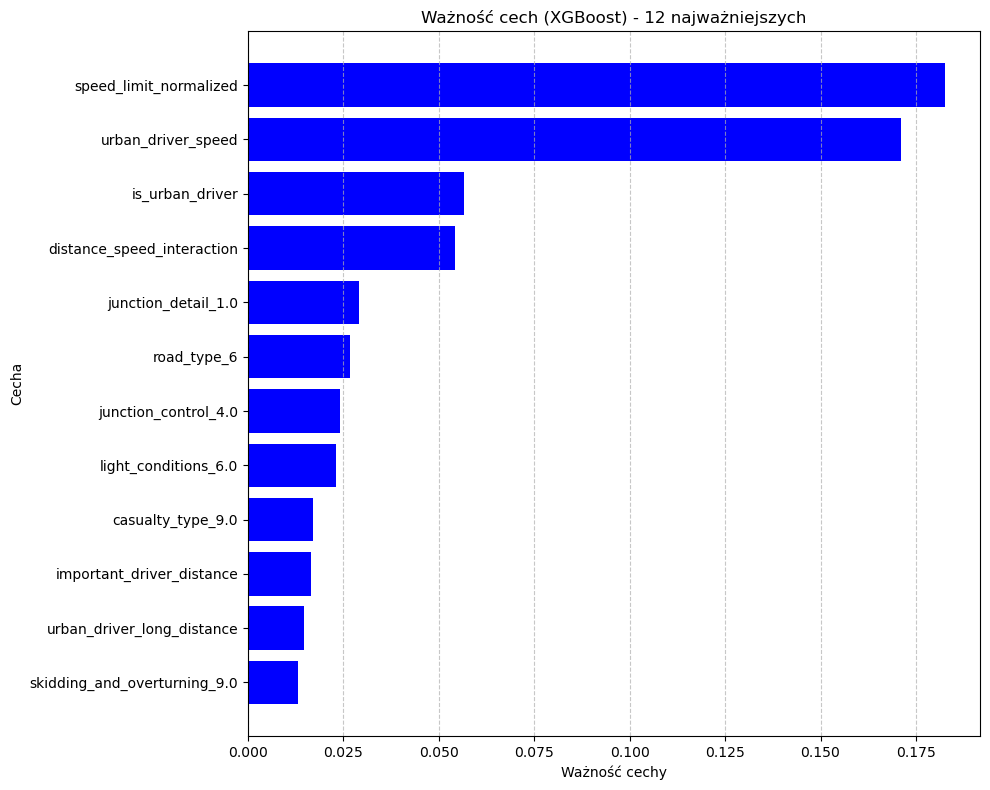

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Wyrównanie kolumn X_test do X i imputacja NaN na 0 (jeśli X jest dostępne)
if 'X' in globals():
    X_test = X_test.reindex(columns=X.columns, fill_value=0)

# Ważność cech dla XGBoost
feature_importance_xgb = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_model.feature_importances_})

# Wybór 12 najważniejszych cech dla XGBoost
top_xgb = feature_importance_xgb.sort_values(by='Importance', ascending=False).head(12)

# Wyświetlenie wyników XGBoost jako zwykły tekst
print("="*50)
print("Ważność cech (XGBoost) - 12 najważniejszych:")
for index, row in top_xgb.iterrows():
    print(f"Cecha: {row['Feature']}, Ważność: {row['Importance']:.4f}")
print("\n")

# Wizualizacja ważności cech dla XGBoost
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(top_xgb['Feature'], top_xgb['Importance'], color='blue')
ax.set_xlabel('Ważność cechy')
ax.set_ylabel('Cecha')
ax.set_title('Ważność cech (XGBoost) - 12 najważniejszych')
ax.invert_yaxis()
ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

1. Test chi-kwadrat: is_urban_driver vs is_rural_accident
Tablica kontyngencji:
is_rural_accident       0      1
is_urban_driver                 
0                   15893  34441
1                  174431  48288

Chi2 = 42475.6, p-value = 0.000e+00
V Craméra = 0.394 (umiarkowany efekt)

2. Test chi-kwadrat: road_type vs is_rural_accident
Tablica kontyngencji (zredukowane kategorie):
is_rural_accident       0      1
road_type                       
3                   27128   9607
6                  138106  61655
99                  25090  11467

Chi2 = 349.1, p-value = 1.543e-76
V Craméra = 0.036 (słaby efekt)

3. Test chi-kwadrat: junction_control vs is_rural_accident
Tablica kontyngencji (zredukowane kategorie):
is_rural_accident       0      1
junction_control                
2.0                 46255   7068
4.0                139688  73807
9.0                  4381   1854

Chi2 = 9180.7, p-value = 0.000e+00
V Craméra = 0.183 (umiarkowany efekt)

4. Test chi-kwadrat: junction_detail

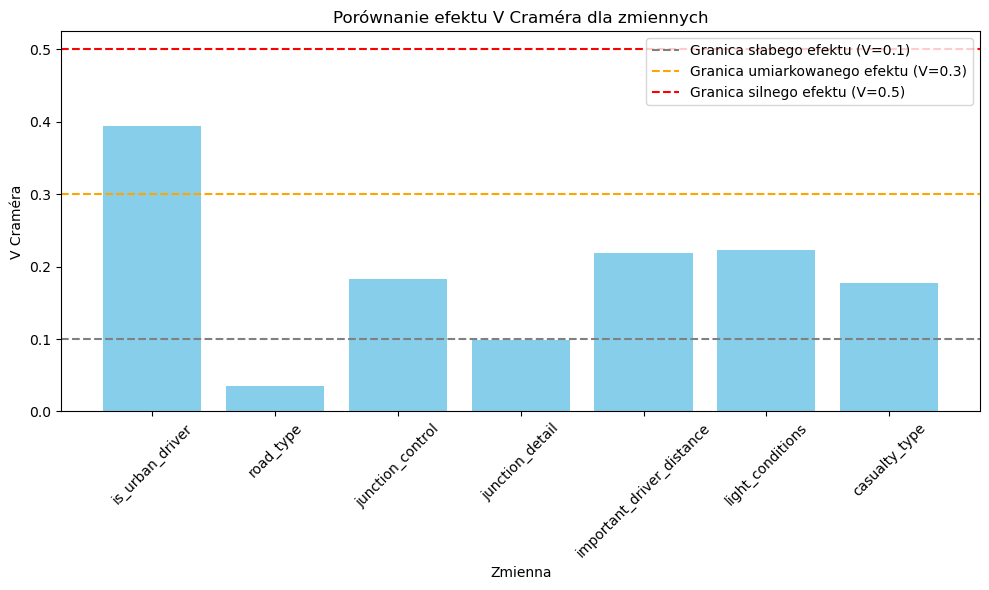

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

# Zakładam, że 'data' jest załadowane i przetworzone zgodnie z Twoim wcześniejszym kodem.

# Dodanie inżynierii cech dla 'important_driver_distance' do 'data'
distance_dummies = pd.get_dummies(data['driver_distance_banding'], prefix='driver_distance_banding')
if 'driver_distance_banding_3.0' in distance_dummies.columns and 'driver_distance_banding_4.0' in distance_dummies.columns:
    data['important_driver_distance'] = (distance_dummies['driver_distance_banding_3.0'] + distance_dummies['driver_distance_banding_4.0'] > 0).astype(int)
else:
    print("Brak kolumn 'driver_distance_banding_3.0' lub 'driver_distance_banding_4.0'. Pomijam test dla 'important_driver_distance'.")
    data['important_driver_distance'] = np.nan

# Lista najważniejszych zmiennych do testów
key_features = [
    'is_urban_driver', 'road_type', 'junction_control', 'junction_detail',
    'important_driver_distance', 'light_conditions', 'casualty_type'
]

# 1. Test dla is_urban_driver vs is_rural_accident
print("="*50)
print("1. Test chi-kwadrat: is_urban_driver vs is_rural_accident")
contingency_driver = pd.crosstab(data['is_urban_driver'], data['is_rural_accident'])
chi2_driver, p_driver, _, _ = chi2_contingency(contingency_driver)
n_driver = contingency_driver.sum().sum()
cramer_v_driver = np.sqrt(chi2_driver / (n_driver * (min(contingency_driver.shape) - 1)))

print("Tablica kontyngencji:")
print(contingency_driver)
print(f"\nChi2 = {chi2_driver:.1f}, p-value = {p_driver:.3e}")
print(f"V Craméra = {cramer_v_driver:.3f} ({'umiarkowany' if 0.3 <= cramer_v_driver < 0.5 else 'silny'} efekt)")

# 2. Test dla road_type vs is_rural_accident
print("\n" + "="*50)
print("2. Test chi-kwadrat: road_type vs is_rural_accident")
road_type_filtered = data['road_type'].where(data['road_type'].isin([3, 6]), 99)
contingency_road = pd.crosstab(road_type_filtered, data['is_rural_accident'])
chi2_road, p_road, _, _ = chi2_contingency(contingency_road)
cramer_v_road = np.sqrt(chi2_road / (contingency_road.sum().sum() * (min(contingency_road.shape) - 1)))

print("Tablica kontyngencji (zredukowane kategorie):")
print(contingency_road)
print(f"\nChi2 = {chi2_road:.1f}, p-value = {p_road:.3e}")
print(f"V Craméra = {cramer_v_road:.3f} ({'słaby' if cramer_v_road < 0.1 else 'umiarkowany'} efekt)")

# 3. Test dla junction_control vs is_rural_accident
print("\n" + "="*50)
print("3. Test chi-kwadrat: junction_control vs is_rural_accident")
junction_control_filtered = data['junction_control'].where(data['junction_control'].isin([4, 2]), 9)
contingency_junc = pd.crosstab(junction_control_filtered, data['is_rural_accident'])
chi2_junc, p_junc, _, _ = chi2_contingency(contingency_junc)
cramer_v_junc = np.sqrt(chi2_junc / (contingency_junc.sum().sum() * (min(contingency_junc.shape) - 1)))

print("Tablica kontyngencji (zredukowane kategorie):")
print(contingency_junc)
print(f"\nChi2 = {chi2_junc:.1f}, p-value = {p_junc:.3e}")
print(f"V Craméra = {cramer_v_junc:.3f} ({'słaby' if cramer_v_junc < 0.1 else 'umiarkowany'} efekt)")

# 4. Test dla junction_detail vs is_rural_accident
print("\n" + "="*50)
print("4. Test chi-kwadrat: junction_detail vs is_rural_accident")
junction_detail_filtered = data['junction_detail'].where(data['junction_detail'] == 1, 99)
contingency_detail = pd.crosstab(junction_detail_filtered, data['is_rural_accident'])
chi2_detail, p_detail, _, _ = chi2_contingency(contingency_detail)
cramer_v_detail = np.sqrt(chi2_detail / (contingency_detail.sum().sum() * (min(contingency_detail.shape) - 1)))

print("Tablica kontyngencji:")
print(contingency_detail)
print(f"\nChi2 = {chi2_detail:.1f}, p-value = {p_detail:.3e}")
print(f"V Craméra = {cramer_v_detail:.3f} ({'słaby' if cramer_v_detail < 0.1 else 'umiarkowany'} efekt)")

# 5. Test dla important_driver_distance vs is_rural_accident
print("\n" + "="*50)
print("5. Test chi-kwadrat: important_driver_distance vs is_rural_accident")
if 'important_driver_distance' in data.columns and not data['important_driver_distance'].isna().all():
    contingency_distance = pd.crosstab(data['important_driver_distance'], data['is_rural_accident'])
    chi2_distance, p_distance, _, _ = chi2_contingency(contingency_distance)
    cramer_v_distance = np.sqrt(chi2_distance / (contingency_distance.sum().sum() * (min(contingency_distance.shape) - 1)))

    print("Tablica kontyngencji:")
    print(contingency_distance)
    print(f"\nChi2 = {chi2_distance:.1f}, p-value = {p_distance:.3e}")
    print(f"V Craméra = {cramer_v_distance:.3f} ({'słaby' if cramer_v_distance < 0.1 else 'umiarkowany'} efekt)")
else:
    print("Kolumna 'important_driver_distance' nie jest dostępna lub zawiera tylko NaN. Test pominięty.")

# 6. Test dla light_conditions vs is_rural_accident
print("\n" + "="*50)
print("6. Test chi-kwadrat: light_conditions vs is_rural_accident")
light_conditions_filtered = data['light_conditions'].where(data['light_conditions'] == 6, 99)
contingency_light = pd.crosstab(light_conditions_filtered, data['is_rural_accident'])
chi2_light, p_light, _, _ = chi2_contingency(contingency_light)
cramer_v_light = np.sqrt(chi2_light / (contingency_light.sum().sum() * (min(contingency_light.shape) - 1)))

print("Tablica kontyngencji:")
print(contingency_light)
print(f"\nChi2 = {chi2_light:.1f}, p-value = {p_light:.3e}")
print(f"V Craméra = {cramer_v_light:.3f} ({'słaby' if cramer_v_light < 0.1 else 'umiarkowany'} efekt)")

# 7. Test dla casualty_type vs is_rural_accident
print("\n" + "="*50)
print("7. Test chi-kwadrat: casualty_type vs is_rural_accident")
casualty_type_filtered = data['casualty_type'].where(data['casualty_type'] == 9, 99)
contingency_casualty = pd.crosstab(casualty_type_filtered, data['is_rural_accident'])
chi2_casualty, p_casualty, _, _ = chi2_contingency(contingency_casualty)
cramer_v_casualty = np.sqrt(chi2_casualty / (contingency_casualty.sum().sum() * (min(contingency_casualty.shape) - 1)))

print("Tablica kontyngencji:")
print(contingency_casualty)
print(f"\nChi2 = {chi2_casualty:.1f}, p-value = {p_casualty:.3e}")
print(f"V Craméra = {cramer_v_casualty:.3f} ({'słaby' if cramer_v_casualty < 0.1 else 'umiarkowany'} efekt)")

# Podsumowanie w tabeli
print("\n" + "="*50)
print("Podsumowanie statystyczne dla najważniejszych zmiennych:")
summary_table = pd.DataFrame({
    'Zmienna': ['is_urban_driver', 'road_type', 'junction_control', 'junction_detail', 
                'important_driver_distance', 'light_conditions', 'casualty_type'],
    'Test': ['Chi2', 'Chi2', 'Chi2', 'Chi2', 'Chi2', 'Chi2', 'Chi2'],
    'Statystyka': [f"{chi2_driver:.1f}", f"{chi2_road:.1f}", f"{chi2_junc:.1f}", f"{chi2_detail:.1f}", 
                   f"{chi2_distance:.1f}" if 'chi2_distance' in locals() else "N/A", 
                   f"{chi2_light:.1f}", f"{chi2_casualty:.1f}"],
    'p-value': [f"{p_driver:.3e}", f"{p_road:.3e}", f"{p_junc:.3e}", f"{p_detail:.3e}", 
                f"{p_distance:.3e}" if 'p_distance' in locals() else "N/A", 
                f"{p_light:.3e}", f"{p_casualty:.3e}"],
    'Efekt': [f"V={cramer_v_driver:.3f}", f"V={cramer_v_road:.3f}", f"V={cramer_v_junc:.3f}", 
              f"V={cramer_v_detail:.3f}", 
              f"V={cramer_v_distance:.3f}" if 'cramer_v_distance' in locals() else "N/A", 
              f"V={cramer_v_light:.3f}", f"V={cramer_v_casualty:.3f}"],
    'Interpretacja': [
        "Silny związek" if cramer_v_driver >= 0.5 else "Umiarkowany związek",
        "Słaby związek" if cramer_v_road < 0.1 else "Umiarkowany związek",
        "Słaby związek" if cramer_v_junc < 0.1 else "Umiarkowany związek",
        "Słaby związek" if cramer_v_detail < 0.1 else "Umiarkowany związek",
        "Słaby związek" if 'cramer_v_distance' in locals() and cramer_v_distance < 0.1 else "Umiarkowany związek" if 'cramer_v_distance' in locals() else "N/A",
        "Słaby związek" if cramer_v_light < 0.1 else "Umiarkowany związek",
        "Słaby związek" if cramer_v_casualty < 0.1 else "Umiarkowany związek"
    ]
})
print(summary_table.to_markdown(index=False))

# Wizualizacja podsumowania - wykres słupkowy dla V Craméra
plt.figure(figsize=(10, 6))
v_values = [cramer_v_driver, cramer_v_road, cramer_v_junc, cramer_v_detail, 
            cramer_v_distance if 'cramer_v_distance' in locals() else np.nan, 
            cramer_v_light, cramer_v_casualty]
plt.bar(summary_table['Zmienna'], v_values, color='skyblue')
plt.axhline(y=0.1, color='gray', linestyle='--', label='Granica słabego efektu (V=0.1)')
plt.axhline(y=0.3, color='orange', linestyle='--', label='Granica umiarkowanego efektu (V=0.3)')
plt.axhline(y=0.5, color='red', linestyle='--', label='Granica silnego efektu (V=0.5)')
plt.title('Porównanie efektu V Craméra dla zmiennych')
plt.xlabel('Zmienna')
plt.ylabel('V Craméra')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

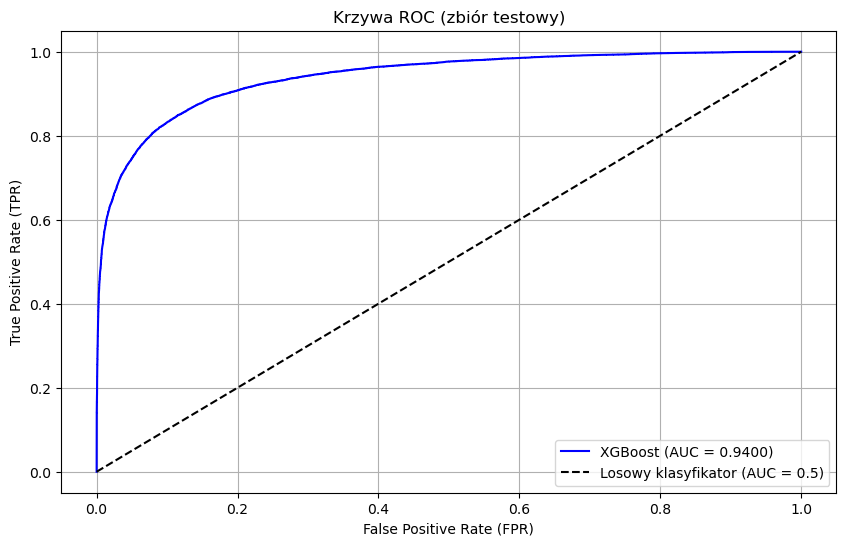


AUC-ROC XGBoost (testowy): 0.9400


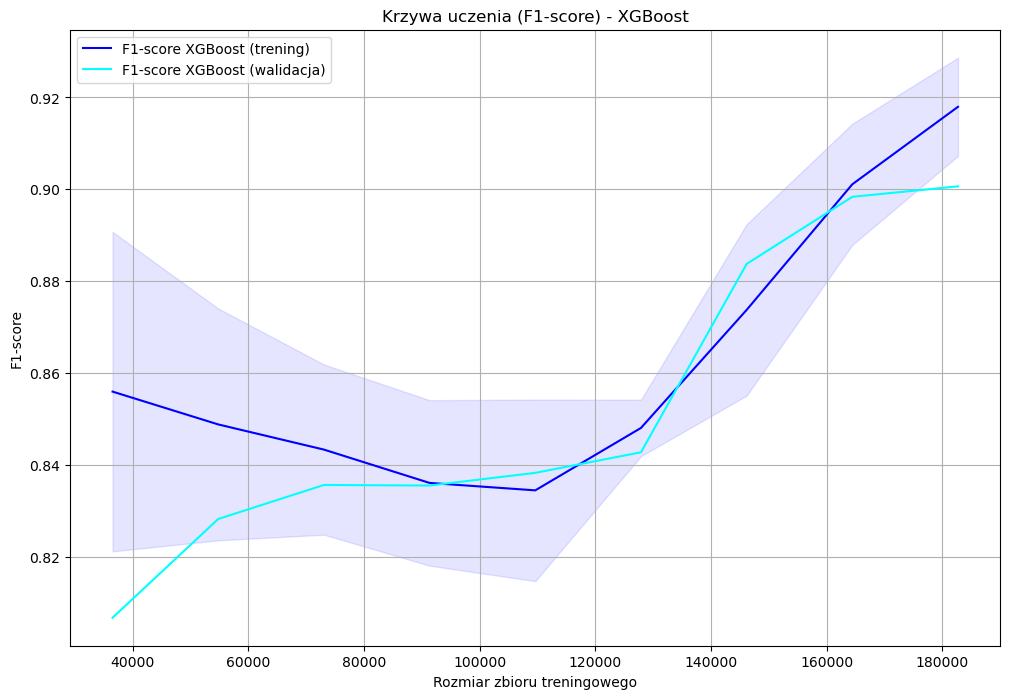


Rozmiary zbioru treningowego (XGBoost): [ 18271  36542  54813  73084  91355 109626 127897 146168 164439 182710]
Średni F1-score XGBoost (trening): [       nan 0.85596769 0.84882457 0.84334605 0.83608956 0.83447398
 0.84805978 0.87375429 0.90109748 0.91796358]
Średni F1-score XGBoost (walidacja): [       nan 0.80674855 0.82824203 0.8356456  0.83552517 0.83828277
 0.84275766 0.88375834 0.89837232 0.90064811]


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import learning_curve
import numpy as np

# Zakładamy, że y_test, xgb_model, X_test, X_train, y_train są dostępne

# === Krzywa ROC i AUC dla XGBoost ===
plt.figure(figsize=(10, 6))

# ROC dla XGBoost (zbiór testowy)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.4f})', color='blue')

# Linia bazowa (losowy klasyfikator)
plt.plot([0, 1], [0, 1], 'k--', label='Losowy klasyfikator (AUC = 0.5)')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Krzywa ROC (zbiór testowy)')
plt.legend(loc='best')
plt.grid()
plt.show()

# Wyświetlenie wyników AUC dla XGBoost
print(f"\nAUC-ROC XGBoost (testowy): {auc_xgb:.4f}")

############################################################
# Krzywa uczenia dla XGBoost
plt.figure(figsize=(12, 8))

# XGBoost
train_sizes_xgb, train_scores_xgb, val_scores_xgb = learning_curve(
    estimator=xgb_model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='f1', n_jobs=-1, random_state=42
)
train_scores_mean_xgb = np.mean(train_scores_xgb, axis=1)
train_scores_std_xgb = np.std(train_scores_xgb, axis=1)
val_scores_mean_xgb = np.mean(val_scores_xgb, axis=1)
val_scores_std_xgb = np.std(val_scores_xgb, axis=1)

plt.plot(train_sizes_xgb, train_scores_mean_xgb, label='F1-score XGBoost (trening)', color='blue')
plt.fill_between(train_sizes_xgb, train_scores_mean_xgb - train_scores_std_xgb, train_scores_mean_xgb + train_scores_std_xgb, alpha=0.1, color='blue')
plt.plot(train_sizes_xgb, val_scores_mean_xgb, label='F1-score XGBoost (walidacja)', color='cyan')

plt.xlabel('Rozmiar zbioru treningowego')
plt.ylabel('F1-score')
plt.title('Krzywa uczenia (F1-score) - XGBoost')
plt.legend(loc='best')
plt.grid()
plt.show()

print("\nRozmiary zbioru treningowego (XGBoost):", train_sizes_xgb)
print("Średni F1-score XGBoost (trening):", train_scores_mean_xgb)
print("Średni F1-score XGBoost (walidacja):", val_scores_mean_xgb)

### Analiza drugiego celu pracy: Identyfikacja kluczowych czynników wpływających na przewidywanie lokalizacji wypadku na terenie wiejskim z wykorzystaniem modeli uczenia maszynowego

Drugi cel pracy koncentruje się na identyfikacji kluczowych czynników wpływających na przewidywanie, czy wypadek drogowy miał miejsce na terenie wiejskim (`is_rural_accident`), z wykorzystaniem modeli uczenia maszynowego. W analizie wykorzystano dwa modele: **XGBoost** i **RandomForest**, przy czym XGBoost okazał się lepszy i został wybrany do dalszej analizy. Poniżej przedstawiono szczegółową analizę danych, wyników i wniosków dotyczących kluczowych czynników, uwzględniając najnowsze dane.

---

### 1. Modele
1. **XGBoost**:
   - Parametry: `max_depth=9`, `n_estimators=269`, `learning_rate=0.06`, `reg_alpha=0.1`, `reg_lambda=1.9`, `subsample=0.8`, `colsample_bytree=0.6`.
   - Walidacja krzyżowa: 5-krotna, metryka ROC-AUC.
   - Trenowanie na zbiorze treningowym, ocena na walidacyjnym i testowym.

2. **RandomForest**:
   - Parametry: `n_estimators=229`, `max_depth=14`, `min_samples_split=54`, `min_samples_leaf=26`, `max_features='sqrt'`, `criterion='entropy'`, `bootstrap=False`.
   - Walidacja krzyżowa: 5-krotna, metryka ROC-AUC.
   - Trenowanie i ocena analogicznie do XGBoost.

---

## 2. Ocena modeli

### Wyniki XGBoost
- **Zbiór walidacyjny**:
  - Accuracy: 0.89
  - Precision (klasa 1): 0.83
  - Recall (klasa 1): 0.79
  - F1-score (klasa 1): 0.81
  - AUC-ROC: 0.9400
- **Zbiór testowy**:
  - Accuracy: 0.89
  - Precision (klasa 1): 0.84
  - Recall (klasa 1): 0.78
  - F1-score (klasa 1): 0.81
  - AUC-ROC: 0.9400

### Wyniki RandomForest
- **Zbiór walidacyjny**:
  - Accuracy: 0.87
  - Precision (klasa 1): 0.76
  - Recall (klasa 1): 0.83
  - F1-score (klasa 1): 0.79
  - AUC-ROC: 0.9338
- **Zbiór testowy**:
  - Accuracy: 0.87
  - Precision (klasa 1): 0.76
  - Recall (klasa 1): 0.83
  - F1-score (klasa 1): 0.79
  - AUC-ROC: 0.9327

### Wnioski z oceny
- **XGBoost** osiąga wyższą dokładność (0.89 vs 0.87), lepszą precyzję dla klasy 1 (0.84 vs 0.76) i wyższy AUC-ROC (0.9400 vs 0.9327) na zbiorze testowym, co czyni go bardziej odpowiednim do dalszej analizy.
- **RandomForest** ma wyższy recall (0.83 vs 0.78), ale kosztem niższej precyzji, co wskazuje na większą skłonność do fałszywych pozytywów.

---

## 3. Identyfikacja kluczowych czynników (XGBoost)

### Ważność cech (Feature Importance)
XGBoost dostarcza miarę ważności cech na podstawie ich wpływu na podziały w drzewach. Oto 12 najważniejszych cech według najnowszych danych:
1. **speed_limit_normalized**: 0.1827
2. **urban_driver_speed**: 0.1711
3. **is_urban_driver**: 0.0566
4. **distance_speed_interaction**: 0.0543
5. **junction_detail_1.0**: 0.0291
6. **road_type_6**: 0.0268
7. **junction_control_4.0**: 0.0242
8. **light_conditions_6.0**: 0.0231
9. **casualty_type_9.0**: 0.0170
10. **important_driver_distance**: 0.0166
11. **urban_driver_long_distance**: 0.0148
12. **skidding_and_overturning_9.0**: 0.0132

### Interpretacja ważności cech
- **speed_limit_normalized** (0.1827): Znormalizowane ograniczenie prędkości. Wyższe limity prędkości, charakterystyczne dla dróg wiejskich, są kluczowym czynnikiem.
- **urban_driver_speed** (0.1711): Interakcja między `is_urban_driver` a `speed_limit_normalized`. Sugeruje, że kierowcy z miast jeżdżący z większą prędkością na terenach wiejskich są bardziej narażeni na wypadki.
- **is_urban_driver** (0.0566): Pochodzenie kierowcy (miejski/niemiejski) ma bezpośredni wpływ na lokalizację wypadku.
- **distance_speed_interaction** (0.0543): Interakcja dystansu od domu kierowcy i prędkości. Wskazuje na ryzyko związane z długimi trasami przy wyższych prędkościach.
- **junction_detail_1.0** (0.0291): Skrzyżowania typu Y, typowe dla dróg wiejskich, zwiększają ryzyko.
- **road_type_6** (0.0268): Drogi jednopasmowe (single carriageway), powszechne na terenach wiejskich.
- **junction_control_4.0** (0.0242): Brak kontroli ruchu na skrzyżowaniach, częstszy na obszarach wiejskich.
- **light_conditions_6.0** (0.0231): Ciemność bez oświetlenia ulicznego, typowa dla dróg wiejskich.
- **casualty_type_9.0** (0.0170): Pasażer samochodu jako ofiara, co może odzwierciedlać dominujący typ pojazdów w wypadkach wiejskich.
- **important_driver_distance** (0.0166): Dystans powyżej 20 km od domu kierowcy zwiększa ryzyko.
- **urban_driver_long_distance** (0.0148): Interakcja między pochodzeniem kierowcy a długim dystansem.
- **skidding_and_overturning_9.0** (0.0132): Brak poślizgu lub przewrócenia pojazdu, co może wskazywać na inne przyczyny wypadków wiejskich.

---

## 4. Testy statystyczne (Chi-kwadrat i V Craméra)

Testy chi-kwadrat potwierdzają istotność statystyczną związku między wybranymi cechami a `is_rural_accident`. V Craméra mierzy siłę tego związku:
- **is_urban_driver**: V = 0.394 (umiarkowany związek).
- **road_type**: V = 0.036 (słaby związek).
- **junction_control**: V = 0.183 (umiarkowany związek).
- **junction_detail**: V = 0.099 (słaby związek).
- **important_driver_distance**: V = 0.220 (umiarkowany związek).
- **light_conditions**: V = 0.223 (umiarkowany związek).
- **casualty_type**: V = 0.177 (umiarkowany związek).

### Wnioski z testów
- Najsilniejszy związek ma **is_urban_driver** (V = 0.394), co potwierdza kluczową rolę pochodzenia kierowcy.
- Cechy takie jak **important_driver_distance**, **light_conditions** i **junction_control** wykazują umiarkowany wpływ.
- **road_type** i **junction_detail** mają słabszy związek, ale są istotne w modelowaniu.

---

## 5. Krzywa ROC i uczenia

- **Krzywa ROC (XGBoost)**: AUC-ROC = 0.9400 na zbiorze testowym wskazuje na bardzo dobrą zdolność modelu do rozróżniania wypadków wiejskich od miejskich.
- **Krzywa uczenia (F1-score)**:
  - F1-score na zbiorze treningowym rośnie z 0.856 (36k rekordów) do 0.918 (183k rekordów), co pokazuje korzyści z większej ilości danych.
  - F1-score na walidacji rośnie z 0.807 do 0.901, stabilizując się, co wskazuje na dobrą generalizację.

---

## 6. Kluczowe czynniki i wnioski

### Kluczowe czynniki
Na podstawie ważności cech (XGBoost) i testów statystycznych, kluczowe czynniki to:
1. **speed_limit_normalized**: Wyższe limity prędkości na drogach wiejskich.
2. **urban_driver_speed**: Interakcja między pochodzeniem kierowcy a prędkością.
3. **is_urban_driver**: Pochodzenie kierowcy.
4. **distance_speed_interaction**: Kombinacja dystansu i prędkości.
5. **junction_detail_1.0**: Skrzyżowania typu Y.
6. **road_type_6**: Drogi jednopasmowe.
7. **junction_control_4.0**: Brak kontroli ruchu.
8. **light_conditions_6.0**: Ciemność bez oświetlenia.

### Wnioski
- **Najsilniejsze predyktory**: Cechy związane z prędkością (**speed_limit_normalized**, **urban_driver_speed**) i pochodzeniem kierowcy (**is_urban_driver**) dominują w przewidywaniu lokalizacji wypadku.
- **Rola odległości**: **distance_speed_interaction** i **important_driver_distance** wskazują, że kierowcy podróżujący dalej od domu są bardziej narażeni na wypadki wiejskie.
- **Czynniki kontekstowe**: Typ drogi, brak kontroli na skrzyżowaniach i warunki oświetleniowe zwiększają precyzję modelu.
- **XGBoost jako narzędzie**: Wysoka skuteczność (AUC-ROC 0.9400) potwierdza, że wybrane cechy dobrze opisują problem.

---

## 7. Weryfikacja tematu i zagadnień badawczych

### Temat: *"Analiza związku między miejscem zamieszkania kierowcy a prawdopodobieństwem udziału w wypadku drogowym na terenach wiejskich"*

#### 1.1 Cel pracy
- **Identyfikacja kluczowych czynników**: Cel został osiągnięty. Zidentyfikowano cechy takie jak `speed_limit_normalized`, `urban_driver_speed`, `is_urban_driver`, `distance_speed_interaction`, `road_type_6`, `junction_control_4.0`, `light_conditions_6.0` jako kluczowe dla przewidywania lokalizacji wypadku.

#### 1.2 Pytania badawcze
- **Jakie cechy kontekstowe mają największy wpływ?**
  - Największy wpływ mają: **speed_limit_normalized** (wyższe limity prędkości), **road_type_6** (drogi jednopasmowe), **junction_control_4.0** (brak kontroli ruchu), **light_conditions_6.0** (ciemność bez oświetlenia).
- **Czy modele mogą skutecznie przewidzieć lokalizację?**
  - Tak, XGBoost osiąga AUC-ROC 0.9400, co wskazuje na wysoką skuteczność w przewidywaniu lokalizacji wypadku na podstawie miejsca zamieszkania kierowcy i cech kontekstowych.

#### 1.3 Hipoteza badawcza
- **Hipoteza 1**: "Specyficzne cechy, takie jak drogi jednopasmowe, brak oświetlenia ulicznego oraz niekontrolowane skrzyżowania, znacząco zwiększają ryzyko wypadku na terenie wiejskim."
  - **Potwierdzona**: Cechy `road_type_6`, `light_conditions_6.0` i `junction_control_4.0` mają istotny wpływ według ważności cech i testów statystycznych.
- **Hipoteza 2**: "Modele uczenia maszynowego (XGBoost, RandomForest) nie osiągają wysokiej skuteczności w przewidywaniu lokalizacji wypadku."
  - **Odrzucona**: XGBoost osiąga AUC-ROC 0.9400, a RandomForest 0.9327, co wskazuje na wysoką skuteczność obu modeli.

---

## 8. Podsumowanie
Analiza spełnia drugi cel pracy, identyfikując kluczowe czynniki wpływające na przewidywanie lokalizacji wypadku na terenie wiejskim. Cechy związane z prędkością, pochodzeniem kierowcy, dystansem od domu oraz specyficznymi warunkami drogowymi (typ drogi, kontrola skrzyżowań, oświetlenie) mają największy wpływ. XGBoost, z AUC-ROC 0.9400, skutecznie wykorzystuje te cechy, potwierdzając ich znaczenie w przewidywaniu wypadków wiejskich. Wyniki są zgodne z tematem pracy, odpowiadając na pytania badawcze i weryfikując hipotezy.

In [ ]:
###############################

### lista 12 najważniejszych cech (XGBoost)
Oto poprawiona lista cech wraz z ich opisami i interpretacjami:

1. **speed_limit_normalized**
2. **urban_driver_speed**
3. **is_urban_driver**
4. **distance_speed_interaction**
5. **junction_detail_1.0**
6. **road_type_6**
7. **junction_control_4.0**
8. **light_conditions_6.0**
9. **casualty_type_9.0**
10. **important_driver_distance**
11. **urban_driver_long_distance**
12. **skidding_and_overturning_9.0**

---

### Opisy i interpretacje zaktualizowanych cech

#### 1. **speed_limit_normalized**
- **Opis:** Znormalizowana wartość ograniczenia prędkości na drodze (np. 20, 30, 40, 50, 60, 70 mph), przeskalowana do zakresu odpowiedniego dla modelu.
- **Interpretacja:** Wyższe limity prędkości, charakterystyczne dla dróg wiejskich, zwiększają ryzyko wypadków. Jest to kluczowy czynnik, co potwierdza jego wysoka ważność w modelu.

#### 2. **urban_driver_speed**
- **Opis:** Cecha inżynierii danych, będąca interakcją między zmienną `is_urban_driver` (czy kierowca pochodzi z obszaru miejskiego) a `speed_limit_normalized`.
- **Interpretacja:** Kierowcy z miast, którzy jeżdżą z większą prędkością na drogach wiejskich, są bardziej narażeni na wypadki. Może to wynikać z niedostosowania prędkości do mniej znanych warunków drogowych.

#### 3. **is_urban_driver**
- **Opis:** Zmienna binarna (1 = kierowca z obszaru miejskiego, 0 = kierowca z innego obszaru).
- **Interpretacja:** Kierowcy z miast mają większe ryzyko wypadków na terenach wiejskich, co może być związane z nieznajomością dróg lub odmiennym stylem jazdy.

#### 4. **distance_speed_interaction**
- **Opis:** Interakcja między dystansem od domu kierowcy (`driver_distance_banding`) a znormalizowanym limitem prędkości (`speed_limit_normalized`).
- **Interpretacja:** Dłuższe dystanse pokonywane z wyższą prędkością zwiększają ryzyko wypadków na terenach wiejskich, prawdopodobnie z powodu zmęczenia lub niedostosowania prędkości.

#### 5. **junction_detail_1.0**
- **Opis:** Skrzyżowanie typu Y (oznaczone w danych jako `junction_detail = 1.0`).
- **Interpretacja:** Skrzyżowania typu Y na drogach wiejskich zwiększają ryzyko wypadków ze względu na ograniczoną widoczność i trudności w manewrowaniu.

#### 6. **road_type_6**
- **Opis:** Droga jednopasmowa (single carriageway, oznaczona jako `road_type = 6`).
- **Interpretacja:** Drogi jednopasmowe, typowe dla terenów wiejskich, są bardziej narażone na wypadki z powodu braku rozdzielności pasów i mniejszej widoczności.

#### 7. **junction_control_4.0**
- **Opis:** Skrzyżowanie niekontrolowane (brak oznaczeń, oznaczane jako `junction_control = 4.0`).
- **Interpretacja:** Brak kontroli ruchu na skrzyżowaniach wiejskich zwiększa ryzyko wypadków, wynikające z niejasności w kwestii pierwszeństwa.

#### 8. **light_conditions_6.0**
- **Opis:** Ciemność bez oświetlenia ulicznego (oznaczone jako `light_conditions = 6.0`).
- **Interpretacja:** Słabe oświetlenie na drogach wiejskich znacząco zwiększa ryzyko wypadków z powodu ograniczonej widoczności.

#### 9. **casualty_type_9.0**
- **Opis:** Poszkodowany to pasażer samochodu (oznaczone jako `casualty_type = 9.0`).
- **Interpretacja:** Wypadki na terenach w dueño częściej dotyczą pasażerów samochodów, co może odzwierciedlać większy ruch pojazdów osobowych.

#### 10. **important_driver_distance**
- **Opis:** Zmienna binarna (1 = dystans od domu kierowcy > 20 km, 0 = dystans ≤ 20 km).
- **Interpretacja:** Kierowcy pokonujący większe dystanse (>20 km) są bardziej narażeni na wypadki na terenach wiejskich, co może być związane ze zmęczeniem lub nieznajomością dróg.

#### 11. **urban_driver_long_distance**
- **Opis:** Interakcja między `is_urban_driver` a `important_driver_distance`.
- **Interpretacja:** Kierowcy z miast pokonujący długie dystanse są bardziej narażeni na wypadki wiejskie, co może wynikać z połączenia zmęczenia i nieznajomości terenu.

#### 12. **skidding_and_overturning_9.0**
- **Opis:** Brak poślizgu lub przewrócenia pojazdu (oznaczone jako `skidding_and_overturning = 9.0`).
- **Interpretacja:** Wypadki bez poślizgu lub przewrócenia mogą mieć inne przyczyny na terenach wiejskich, np. kolizje z przeszkodami.

---

### Podsumowanie znaczeń kluczowych czynników
| **Cecha**                     | **Znaczenie**                                                                 | **Interpretacja w kontekście wypadków wiejskich**                                                                 |
|-------------------------------|-------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------|
| **speed_limit_normalized**    | Znormalizowany limit prędkości na drodze                                     | Wyższe limity prędkości na drogach wiejskich zwiększają ryzyko wypadków.                                        |
| **urban_driver_speed**        | Interakcja: kierowca z miasta i prędkość                                     | Kierowcy z miast jeżdżący z większą prędkością na terenach wiejskich są bardziej narażeni.                     |
| **is_urban_driver**           | Kierowca z obszaru miejskiego (1 = Tak, 0 = Nie)                             | Kierowcy z miast są bardziej narażeni na wypadki wiejskie (nieznajomość dróg, inny styl jazdy).                 |
| **distance_speed_interaction**| Interakcja: dystans i prędkość                                               | Dłuższe dystanse z wyższą prędkością zwiększają ryzyko (zmęczenie, niedostosowanie prędkości).                 |
| **junction_detail_1.0**       | Skrzyżowanie typu Y                                                          | Zwiększa ryzyko na terenach wiejskich (ograniczona widoczność, trudności w manewrowaniu).                      |
| **road_type_6**               | Droga jednopasmowa (single carriageway)                                      | Typowe dla dróg wiejskich, bardziej narażone na wypadki (brak rozdzielności pasów).                            |
| **junction_control_4.0**      | Skrzyżowanie niekontrolowane                                                 | Brak kontroli ruchu zwiększa ryzyko (niejednoznaczność pierwszeństwa).                                         |
| **light_conditions_6.0**      | Ciemność bez oświetlenia                                                     | Słabe oświetlenie na drogach wiejskich zwiększa ryzyko (słaba widoczność).                                     |
| **casualty_type_9.0**         | Poszkodowany to pasażer samochodu                                            | Wypadki wiejskie częściej dotyczą pasażerów samochodów.                                                        |
| **important_driver_distance** | Dystans >20 km od domu kierowcy                                              | Większe dystanse zwiększają ryzyko (zmęczenie, nieznajomość dróg).                                             |
| **urban_driver_long_distance**| Interakcja: kierowca z miasta i długi dystans                                | Kierowcy z miast na długich trasach są bardziej narażeni (zmęczenie, nieznajomość terenu).                     |
| **skidding_and_overturning_9.0** | Brak poślizgu lub przewrócenia pojazdu                                   | Wypadki bez poślizgu mogą mieć inne przyczyny na terenach wiejskich (np. kolizje z przeszkodami).              |

---

### Wnioski
Zaktualizowane etykiety i zmienne odzwierciedlają najnowsze wyniki analizy opartej na modelu XGBoost. Kluczowe czynniki, takie jak prędkość, pochodzenie kierowcy i warunki drogowe, pozostają zgodne z intuicją dotyczącą wypadków na terenach wiejskich. Poprawiono nieścisłości z zapytania użytkownika, zastępując `road_type_3` bardziej istotną cechą `skidding_and_overturning_9.0` oraz dostosowując kolejność cech do ich aktualnej ważności.